In [46]:
import numpy as np
import pandas as pd
import datetime
import json
import matplotlib.pyplot as plt
from numpy import arange
from numpy import printoptions
from pandas import read_csv
from pandas import set_option
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score

In [47]:
IEX_data = pd.read_json("https://sandbox.iexapis.com/stable/stock/twtr/chart/max?token=Tsk_64a24f75e3f34d63bde86266f46a3eb2")
IEX_data['TIMESTAMP'] = IEX_data[['date']].apply(lambda x: x[0].timestamp(), axis=1).astype(int)
df=IEX_data.loc[:,['TIMESTAMP','uOpen']]
df


,TIMESTAMP,uOpen
0,1444608000,30.40
1,1444694400,29.66
2,1444780800,30.62
3,1444867200,29.85
4,1444953600,31.17
...,...,...
1254,1601856000,48.12
1255,1601942400,48.28
1256,1602028800,46.68
1257,1602115200,47.08


In [48]:
array=df.values
X=array[:,0]
Y=array[:,1]
display(X)
display(Y)

array([1.4446080e+09, 1.4446944e+09, 1.4447808e+09, ..., 1.6020288e+09,
       1.6021152e+09, 1.6022016e+09])

array([30.4 , 29.66, 30.62, ..., 46.68, 47.08, 47.  ])

In [49]:
X = array[:, 0].reshape(-1,1)

In [50]:
validation_size=0.20
seed=4
X_train,X_validation,Y_train,Y_validation=train_test_split(X,Y,test_size=validation_size,random_state=seed)


In [51]:
num_folds=3
seed=1
scoring='r2'

In [52]:
models=[]
models.append(('LR',LinearRegression()))
models.append(('LASSO',Lasso()))
models.append(('EN',ElasticNet()))
models.append(('KNN',KNeighborsRegressor()))
models.append(('CART',DecisionTreeRegressor()))
models.append(('SVR',SVR()))
results=[]
names=[]
for name, model in models:  
  kfold=KFold(n_splits=num_folds,random_state=seed,shuffle=True)
  cv_results=cross_val_score(model,X_train,Y_train,cv=kfold,scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg="%s: %f (%f)" % (name,cv_results.mean(),cv_results.std())
  print(msg)

LR: 0.555586 (0.035978)
LASSO: 0.555586 (0.035978)
EN: 0.555586 (0.035978)
KNN: 0.984627 (0.003100)
CART: 0.980441 (0.004435)
SVR: 0.744357 (0.007033)


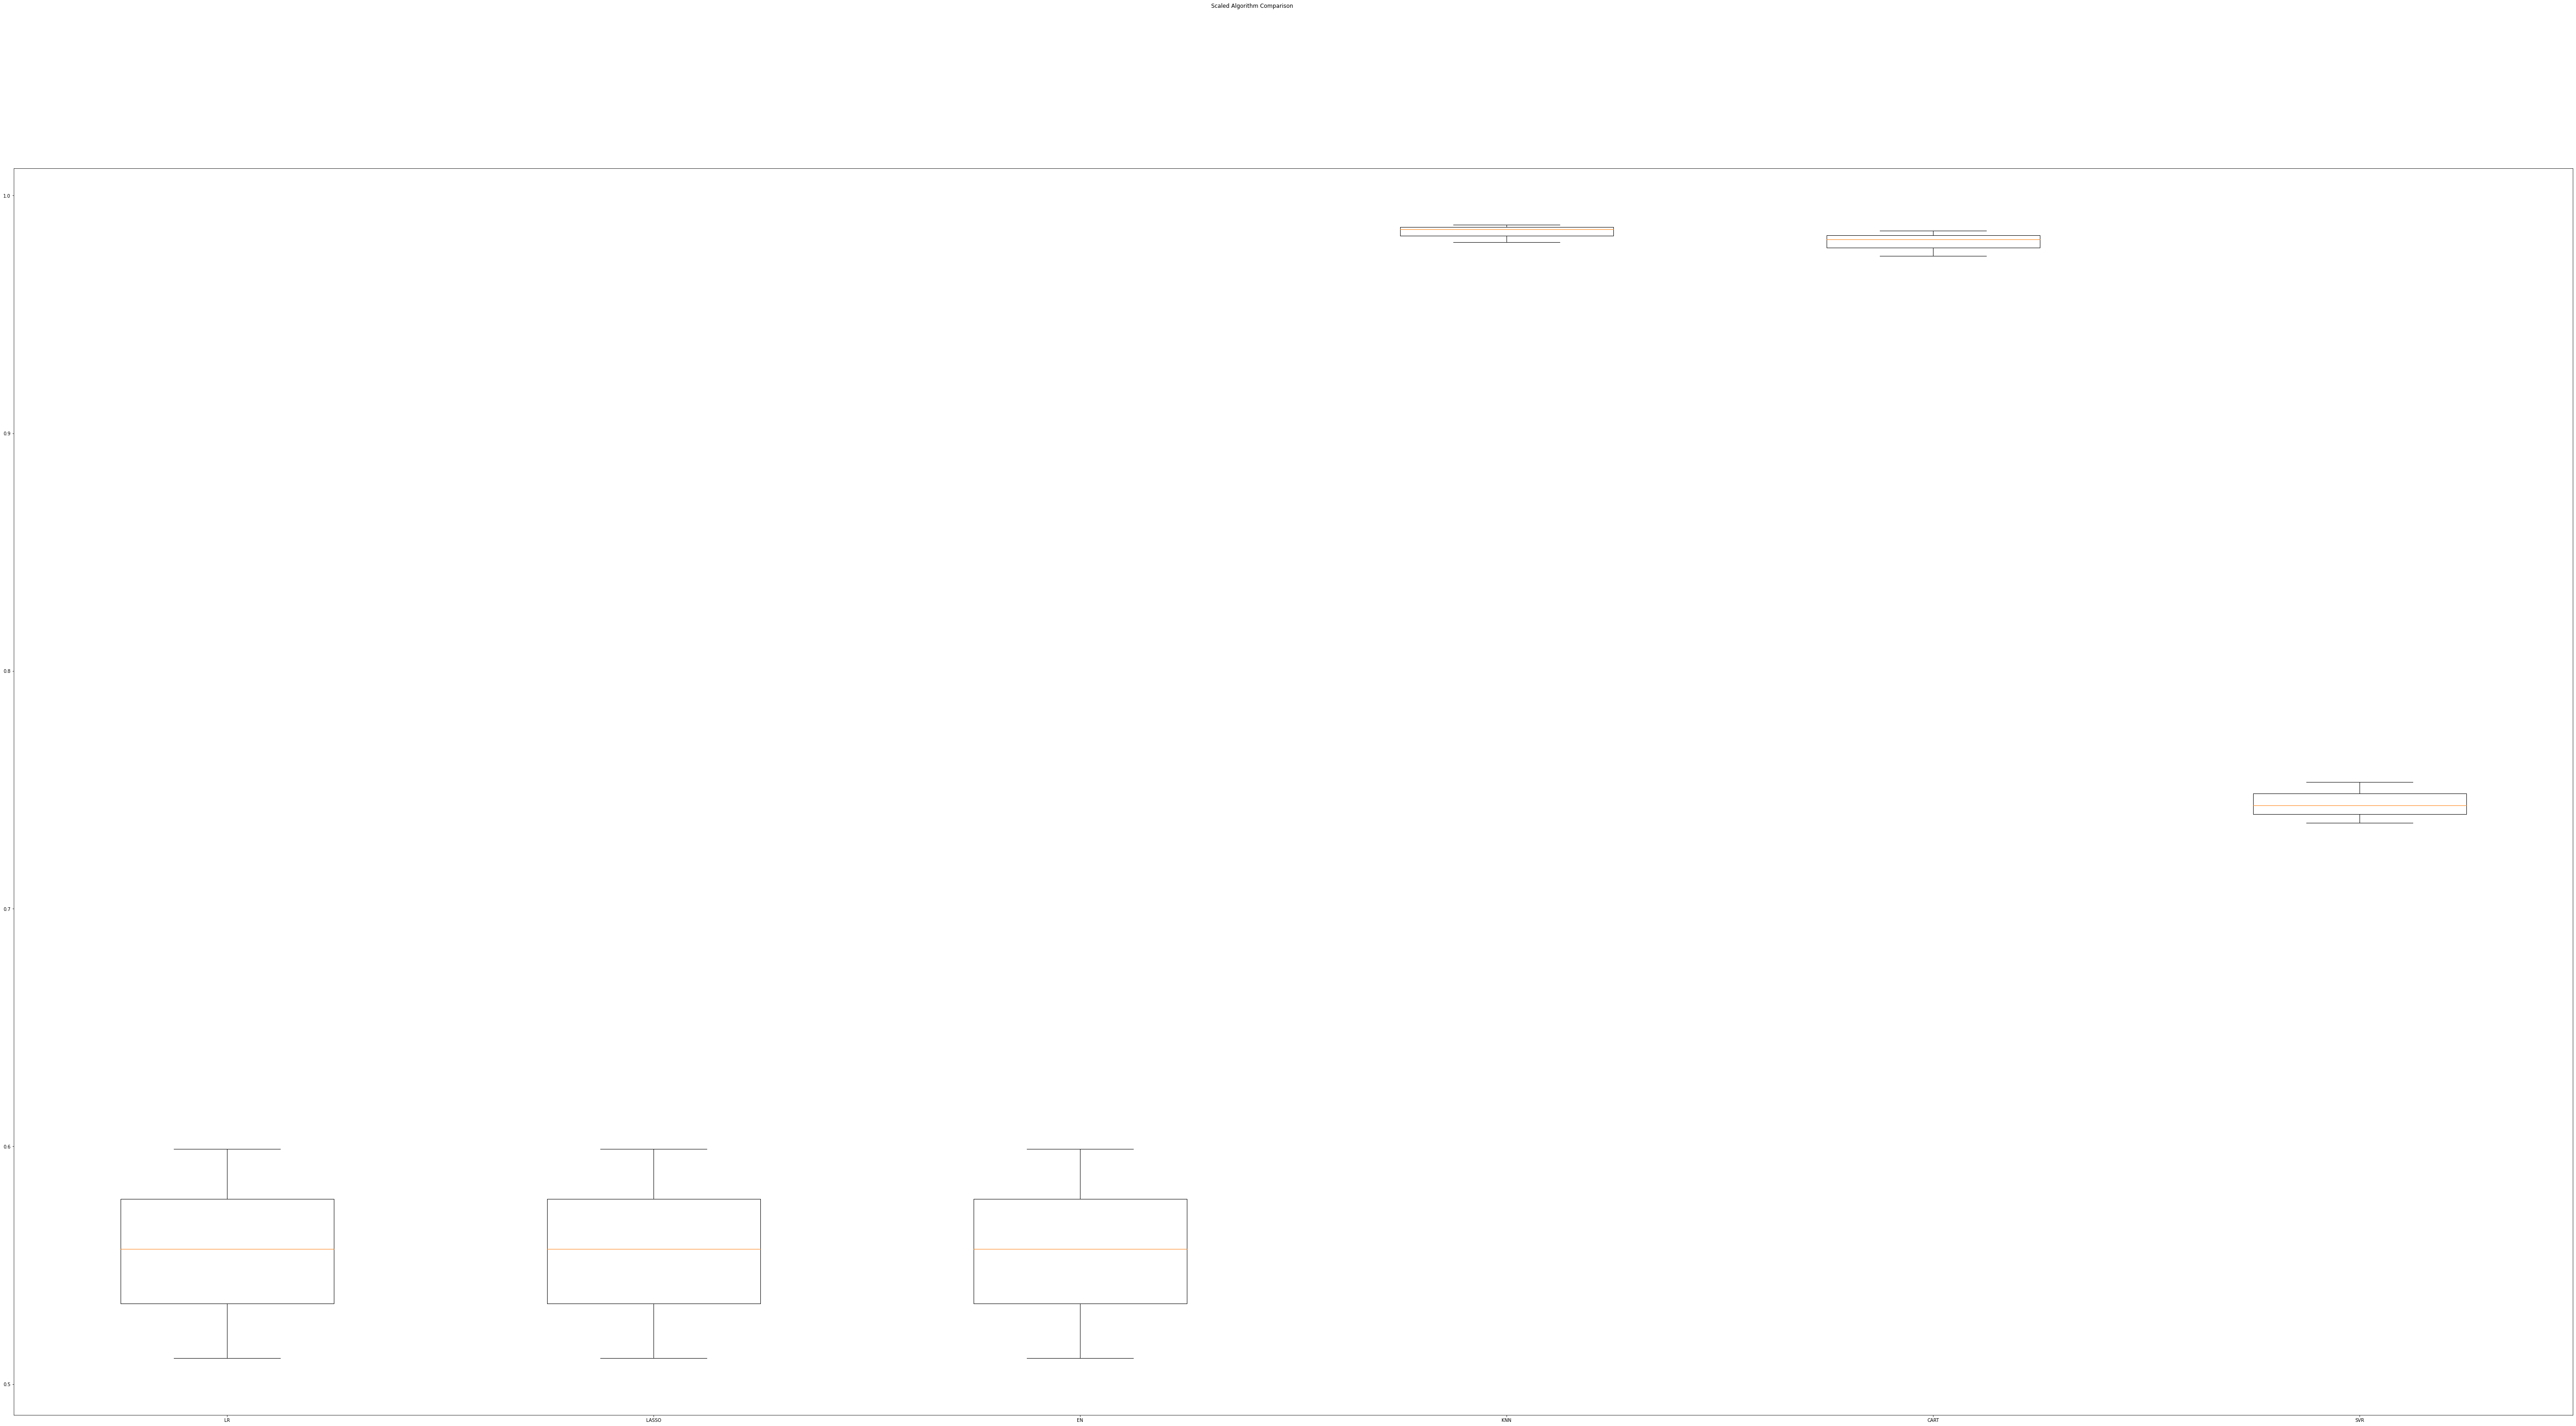

In [53]:
fig=plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax=fig.add_subplot(111) #(rows columns n) n<=rows*columns
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [54]:
model=DecisionTreeRegressor(max_depth=20,random_state=1)
model.fit(X_train, Y_train)
predictions=model.predict(X_validation)

print(r2_score(Y_validation,predictions))


0.9807352607711861


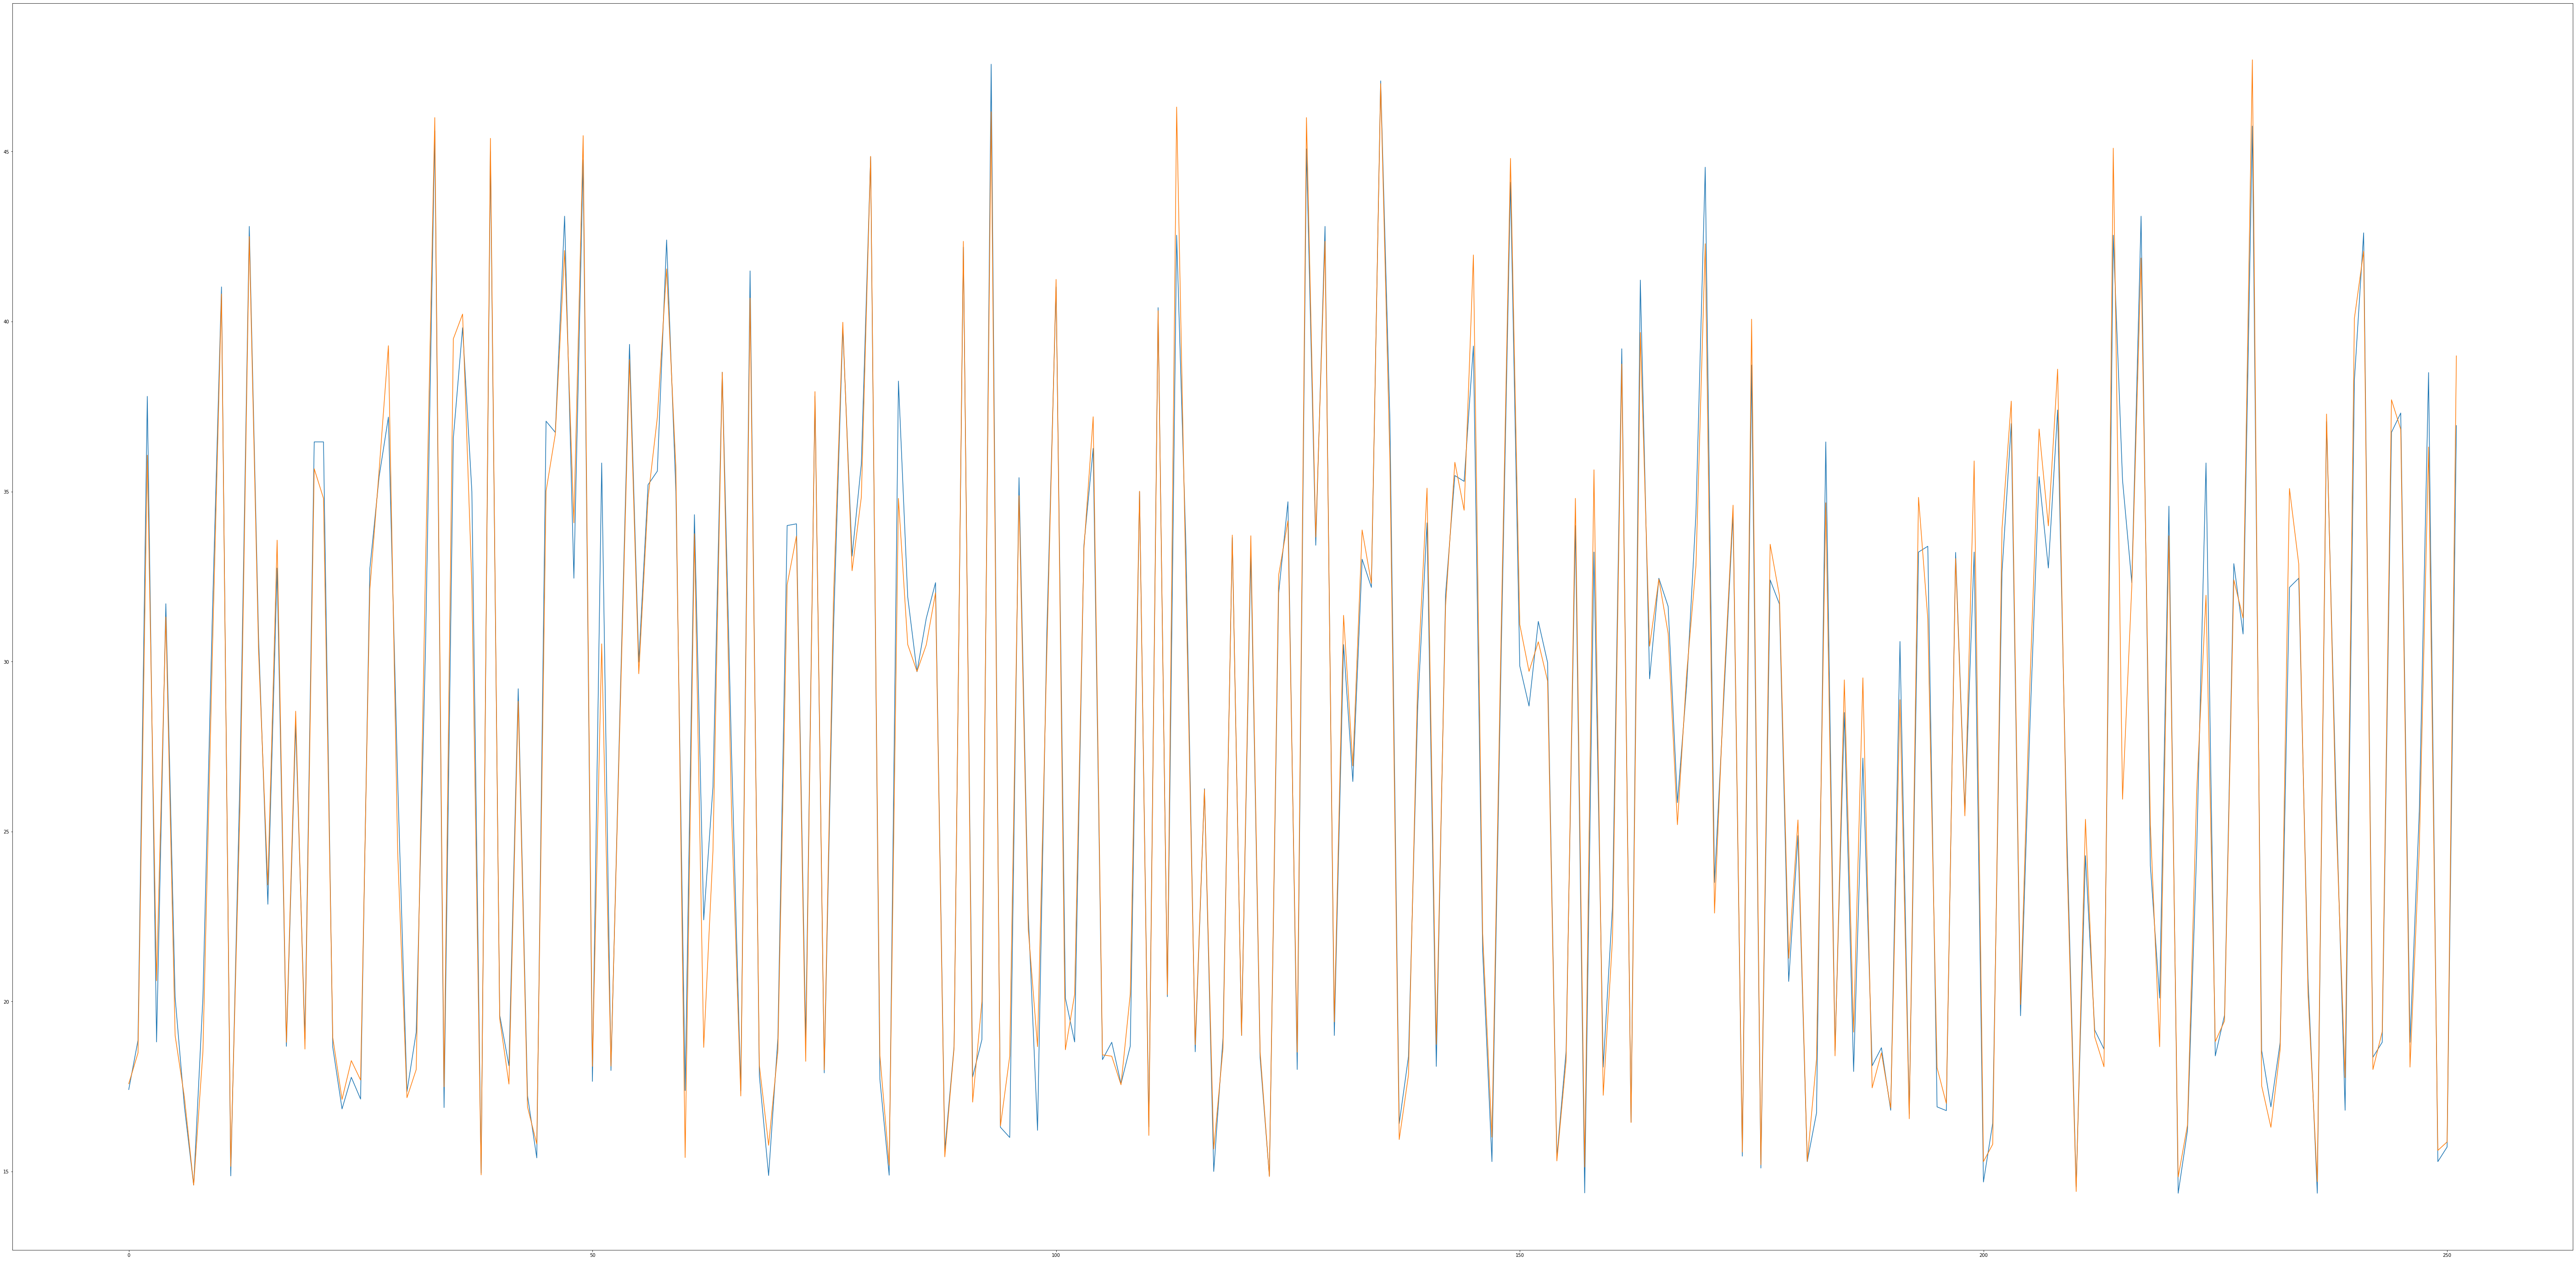

In [55]:
plt.plot(predictions)
plt.plot(Y_validation)

plt.rcParams['figure.figsize']=(100,50)
plt.show()